<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_05_06_ZerosFunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 5
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

1. Implementar el metodo de la bisección para determinar las raices de una función.
2. Implementar el metodo de la newton para determinar las raices de una función.

Prueba tu resultado para:


  
 2. $a e^{x}-2= b\cos(e^x-2)$

> Add blockquote



In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize



In [18]:
f=lambda a, b, x: a*np.exp(x)-2-b*np.cos(np.exp(x)-2)
x=np.linspace(-5,2,100)
a=1
b=2
y=f(a,b,x)


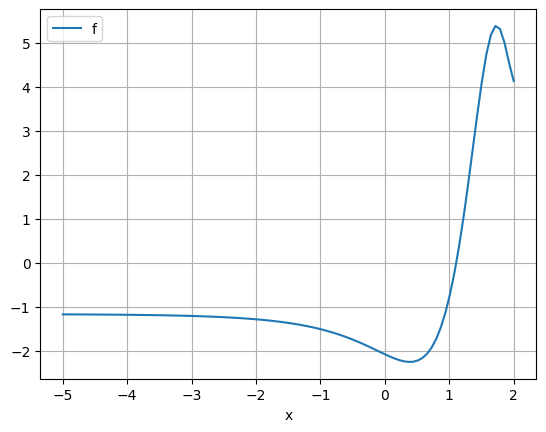

In [19]:
d={'x': x, 'f':y}#serie
df=pd.DataFrame(d)#Dataframe
df.plot.line(x='x',y='f')
plt.grid()
plt.show()

In [20]:
#Biseccion
# para el metodo de biseccion se
f=lambda a, b, x: a*np.exp(x)-2-b*np.cos(np.exp(x)-2)
x=np.linspace(-5,2,100)
a=1
b=2
#con la grafica se puede ver donde puede estar el 0 y determinamos xa,xb
xa=-1
xb=2
Nmax=100
epsilon=1e-5
def bisection(f,xa,xb,epsilon, Nmax):
  n=0
  while (f(a,b,xa)*f(a,b,xb)<0 | n<Nmax): # primera condicion
    n=n+1
    xc = (xa+xb)*0.5 #calculo del punto medio
    if (f(a,b,xc)<0):
      xa = xc
    elif(f(a,b,xc) >0): #si no es el punto donde se hace cero xb=xc y vuelve a calcular el punto medio hasta encontrar la raiz
      xb = xc
    elif( abs(f(a,b,xc))<epsilon ):
      break
    else :  # f(xc=0)
      print("Error")
  return xc
bisection(f, xa, xb, epsilon, Nmax)

1.1085185688224324

In [21]:
f=lambda x: 1*np.exp(x)-2-2*np.cos(np.exp(x)-2)
raiz= optimize.bisect(f, -1, 2)
print('La raiz usando el metodo de biseccion sera:',raiz)

La raiz usando el metodo de biseccion sera: 1.1085185688211823


2. Implementar el metodo de la newton para determinar las raices de una función.
### Newton-Rapshon
\begin{equation}
x_{n+1}=x_n - \frac{f(x)}{f'(x)}
\end{equation}

$f(x)=a e^{x}-2-b\cos(e^x-2)$

$f'(x)=a e^{x}+b\sin(e^x-2)e^{x}$

In [22]:
f=lambda x: 1*np.exp(x)-2-2*np.cos(np.exp(x)-2)
df=lambda x: 1*np.exp(x)+2*np.sin(np.exp(x)-2)*np.exp(x)

In [23]:
raiz_newton = optimize.newton(f,1,df)
print('La raiz usando el metodo de Newton-Rhapson sera:', raiz_newton)

La raiz usando el metodo de Newton-Rhapson sera: 1.1085185688224326


In [24]:
def newton_rapshon(f, df,x0 , epsilon, Nmax):
  n=0
  while((abs(f(x0))>=epsilon) and (n<=Nmax)):
    x1 =x0-f(x0)/df(x0)
    x0=x1
    n=n+1
  return x0

In [25]:
x0 = newton_rapshon(f,df, 1, 1E-5, 100)
x0

1.1085186547459516